<h1 align="center"> <font color='#3ce0e6'>From Data to Predictions: Building a Model for Spaceship Titanic Survival</font></h1>


<h2 align="center"> <font color='#208cb0'>Introduction</font></h2>

In this project, i'll tackle the **Spaceship Titanic** dataset, a fictionalized version of the classic Titanic survival prediction problem set in space. The goal is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with a spacetime anomaly. This project combines **data analysis**, **feature engineering**, and **machine learning** to build a predictive model that accurately classifies passenger outcomes.

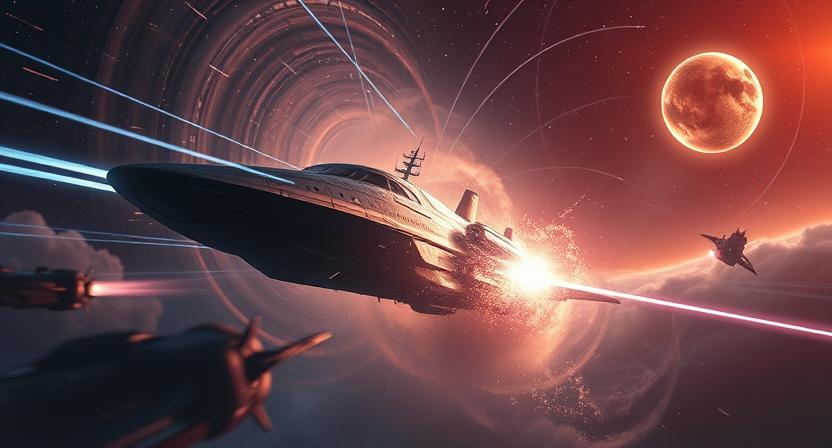

### Key Features
- **PassengerId** – A unique ID in the format `gggg_pp`, where `gggg` represents a travel group.
- **HomePlanet** – The passenger's home planet.
- **CryoSleep** – Whether the passenger was in suspended animation for the trip.
- **Cabin** – Passenger's cabin location (`deck/num/side`).
- **Destination** – The planet the passenger is traveling to.
- **Age** – Passenger's age.
- **VIP** – Whether they paid for a VIP experience.
- **Spending Categories** – Money spent on RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck.
- **Transported** – **The target variable** (True/False), indicating if the passenger was transported.


<h2 align="center"> <font color='#208cb0'>Import Required Libraries 📚</font></h2>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h2 align="center"> <font color='#208cb0'>Load and Explore the Dataset 💾</font></h2>

In [5]:
# Load the trianing and testing data
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Print the Shape of the data
print('Train Shape:', train_df.shape)
print('Test Shape:', test_df.shape)

Train Shape: (8693, 14)
Test Shape: (4277, 13)


In [6]:
# Display infrmation about the data
print(train_df.info())
print("-------------------------------------------------\n Test Data Info")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
-------------------------------------------------
 Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 42

In [7]:
# Print sample of the dataset
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [8]:
# Show distict values in the dataset
for col in train_df.columns:
    print(col, " -- ", train_df[col].nunique())

PassengerId  --  8693
HomePlanet  --  3
CryoSleep  --  2
Cabin  --  6560
Destination  --  3
Age  --  80
VIP  --  2
RoomService  --  1273
FoodCourt  --  1507
ShoppingMall  --  1115
Spa  --  1327
VRDeck  --  1306
Name  --  8473
Transported  --  2


<h2 align="center"> <font color='#208cb0'>Data Preprocessing ⚒️</font></h2>

### Remove Useless columns

In [9]:
# Delete (PassengerId, Name) columns
train_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)

In [10]:
# Split the 'Cabin' column into three new columns delete the original 'Cabin' column
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

# Delete the original 'Cabin' column
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Display the first few rows to verify the changes
train_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S


### Convert columns dtypes

In [11]:
bool_cols = ['CryoSleep', 'VIP']
# Change the data type of the 'CryoSleep' and 'VIP' columns to boolean
train_df[bool_cols] = train_df[bool_cols].astype(bool)
test_df[bool_cols] = test_df[bool_cols].astype(bool)

str_cols = ['Deck', 'Side', 'Destination']
# Change the data type of the 'Deck', 'Side', and 'Destination' columns to string
train_df[str_cols] = train_df[str_cols].astype(str)
test_df[str_cols] = test_df[str_cols].astype(str)

int_cols = ['Age', 'Num']
# Change the data type of the 'Age' and 'Num' columns to integer
train_df[int_cols] = train_df[int_cols].astype('Int64')
test_df[int_cols] = test_df[int_cols].astype('Int64')

float_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Change the data type of the 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' columns to float
train_df[float_cols] = train_df[float_cols].astype('float64')
test_df[float_cols] = test_df[float_cols].astype('float64')

# Display the data types of the columns
train_df.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age               Int64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Num               Int64
Side             object
dtype: object

### Feature Engineering

In [12]:
# Total Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
train_df['TotalBill'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalBill'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

In [13]:
# Convert 'Age' to a categorical column
train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Young Adult', 'Adult', 'Senior']).astype(str)
test_df['Age'] = pd.cut(test_df['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Young Adult', 'Adult', 'Senior']).astype(str)

### Handle missing data and duplicated records

In [14]:
# handle duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [15]:
# Handle missing values
pd.DataFrame(train_df.isna().sum(), columns=['Missing Values Training Data']).merge(
pd.DataFrame(test_df.isna().sum(), columns=['Missing Values Testing Data']), left_index=True, right_index=True)

,Missing Values Training Data,Missing Values Testing Data
HomePlanet,201,87
CryoSleep,0,0
Destination,0,0
Age,0,0
VIP,0,0
RoomService,181,82
FoodCourt,183,106
ShoppingMall,208,98
Spa,183,101
VRDeck,188,80


In [16]:
# Fill missing values in the 'HomePlanet' column with the Mode value
print(f"Mode of HomePlanet column in training set: {train_df['HomePlanet'].mode().values[0]}")
print(f"Mode of HomePlanet column in testing set: {test_df['HomePlanet'].mode().values[0]}")
train_df.fillna({'HomePlanet': train_df['HomePlanet'].mode().values[0]}, inplace=True)
test_df.fillna({'HomePlanet': test_df['HomePlanet'].mode().values[0]}, inplace=True)

Mode of HomePlanet column in training set: Earth
Mode of HomePlanet column in testing set: Earth


In [17]:
# Fill missing values in the 'Num' column with the Mean value
print(f"Mean of Num column in training set: {np.round(train_df['Num'].mean()).astype('int64')}")
print(f"Mean of Num column in testing set: {np.round(test_df['Num'].mean()).astype('int64')}")
train_df.fillna({'Num': np.round(train_df['Num'].mean()).astype('int64')}, inplace=True)
test_df.fillna({'Num': np.round(test_df['Num'].mean()).astype('int64')}, inplace=True)

Mean of Num column in training set: 601
Mean of Num column in testing set: 610


In [18]:
# Fill missing values in the 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' columns with the Mean value
print(f"Mean of RoomService column in training set: {np.round(train_df['RoomService'].mean(), 2)}")
print(f"Mean of RoomService column in testing set: {np.round(test_df['RoomService'].mean(), 2)}")
train_df.fillna({'RoomService': np.round(train_df['RoomService'].mean(), 2)}, inplace=True)
test_df.fillna({'RoomService': np.round(test_df['RoomService'].mean(), 2)}, inplace=True)

print(f"Mean of FoodCourt column in training set: {np.round(train_df['FoodCourt'].mean(), 2)}")
print(f"Mean of FoodCourt column in testing set: {np.round(test_df['FoodCourt'].mean(), 2)}")
train_df.fillna({'FoodCourt': np.round(train_df['FoodCourt'].mean(), 2)}, inplace=True)
test_df.fillna({'FoodCourt': np.round(test_df['FoodCourt'].mean(), 2)}, inplace=True)

print(f"Mean of ShoppingMall column in training set: {np.round(train_df['ShoppingMall'].mean(), 2)}")
print(f"Mean of ShoppingMall column in testing set: {np.round(test_df['ShoppingMall'].mean(), 2)}")
train_df.fillna({'ShoppingMall': np.round(train_df['ShoppingMall'].mean(), 2)}, inplace=True)
test_df.fillna({'ShoppingMall': np.round(test_df['ShoppingMall'].mean(), 2)}, inplace=True)

print(f"Mean of Spa column in training set: {np.round(train_df['Spa'].mean(), 2)}")
print(f"Mean of Spa column in testing set: {np.round(test_df['Spa'].mean(), 2)}")
train_df.fillna({'Spa': np.round(train_df['Spa'].mean(), 2)}, inplace=True)
test_df.fillna({'Spa': np.round(test_df['Spa'].mean(), 2)}, inplace=True)

print(f"Mean of VRDeck column in training set: {np.round(train_df['VRDeck'].mean(), 2)}")
print(f"Mean of VRDeck column in testing set: {np.round(test_df['VRDeck'].mean(), 2)}")
train_df.fillna({'VRDeck': np.round(train_df['VRDeck'].mean(), 2)}, inplace=True)
test_df.fillna({'VRDeck': np.round(test_df['VRDeck'].mean(), 2)}, inplace=True)

Mean of RoomService column in training set: 228.12
Mean of RoomService column in testing set: 219.27
Mean of FoodCourt column in training set: 465.07
Mean of FoodCourt column in testing set: 439.48
Mean of ShoppingMall column in training set: 176.39
Mean of ShoppingMall column in testing set: 177.3
Mean of Spa column in training set: 315.89
Mean of Spa column in testing set: 303.05
Mean of VRDeck column in training set: 309.51
Mean of VRDeck column in testing set: 310.71


In [19]:
# Fill missing values in the 'TotalBill' column with the summuation of the values of the 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' columns
train_df.fillna({'TotalBill': train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']}, inplace=True)
test_df.fillna({'TotalBill': test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']}, inplace=True)

# check that all records of the dataset (TotalBill = RoomService + FoodCourt + ShoppingMall + Spa + VRDeck)
print(f"Train Data: {train_df['TotalBill'].equals(train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck'])}")
print(f"Test Data: {test_df['TotalBill'].equals(test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck'])}")

Train Data: True
Test Data: True


In [20]:
# Check that there are no missing values in the dataset
pd.DataFrame(train_df.isna().sum(), columns=['Missing Values Training Data']).merge(
pd.DataFrame(test_df.isna().sum(), columns=['Missing Values Testing Data']), left_index=True, right_index=True)

,Missing Values Training Data,Missing Values Testing Data
HomePlanet,0,0
CryoSleep,0,0
Destination,0,0
Age,0,0
VIP,0,0
RoomService,0,0
FoodCourt,0,0
ShoppingMall,0,0
Spa,0,0
VRDeck,0,0


### Handle categorical features

In [21]:
# show distict values in categorical columns
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        print(col, " -- ", train_df[col].unique())

HomePlanet  --  ['Europa' 'Earth' 'Mars']
Destination  --  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'nan']
Age  --  ['Adult' 'Young Adult' 'Senior' 'Child' 'nan']
Deck  --  ['B' 'F' 'A' 'G' 'nan' 'E' 'D' 'C' 'T']
Side  --  ['P' 'S' 'nan']


In [22]:
# Replace all the 'nan' values in 'Destination', 'Deck', 'Age' and 'Side' columns with the mode value
train_df['Destination'] = train_df['Destination'].replace('nan', train_df['Destination'].mode().values[0])
test_df['Destination'] = test_df['Destination'].replace('nan', test_df['Destination'].mode().values[0])

train_df['Deck'] = train_df['Deck'].replace('nan', train_df['Deck'].mode().values[0])
test_df['Deck'] = test_df['Deck'].replace('nan', test_df['Deck'].mode().values[0])

train_df['Side'] = train_df['Side'].replace('nan', train_df['Side'].mode().values[0])
test_df['Side'] = test_df['Side'].replace('nan', test_df['Side'].mode().values[0])

train_df['Age'] = train_df['Age'].replace('nan', train_df['Age'].mode().values[0])
test_df['Age'] = test_df['Age'].replace('nan', test_df['Age'].mode().values[0])

In [23]:
# check if there are any 'nan' values left
# show distict values in categorical columns
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        print(col, " -- ", train_df[col].unique())

HomePlanet  --  ['Europa' 'Earth' 'Mars']
Destination  --  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
Age  --  ['Adult' 'Young Adult' 'Senior' 'Child']
Deck  --  ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Side  --  ['P' 'S']


<div class="alert alert-block alert-info""> 

**Data Preprocessing Recap**

1. **Remove Useless Columns**:
    - Deleted the `Name` column from both training and testing datasets and `PassengerId` from training dataset.
    - Split the `Cabin` column into three new columns: `Deck`, `Num`, and `Side` and deleted the original `Cabin` column.

2. **Convert Column Data Types**:
    - Converted `CryoSleep` and `VIP` columns to boolean.
    - Converted `Deck`, `Side`, and `Destination` columns to string.
    - Converted `Num` columns to integer.
    - Converted `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, and `VRDeck` columns to float.

3. **Feature Engineering**:
    - Created a new column `TotalBill` representing the total amount billed by the passenger at various amenities.
    - Converted `Age` to a categorical column.

4. **Handle Missing Data and Duplicated Records**:
    - Removed duplicate records from both training and testing datasets.
    - Filled missing values in the `HomePlanet` column with the mode value.
    - Filled missing values in the `Num` column with the mean value.
    - Filled missing values in the `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, and `VRDeck` columns with the mean value.
    - Filled missing values in the `TotalBill` column with the sum of the values of `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, and `VRDeck` columns.
    - Verified that there are no missing values left in the dataset.

5. **Handle Categorical Columns**:
    - Replaced all the 'nan' values in `Destination`, `Deck`, `Age`, and `Side` columns with the mode value.
    - Verified that there are no 'nan' values left in the categorical columns.
</div>

<h2 align="center"> <font color='#208cb0'>Exploratory Data Analysis (EDA) 📊</font></h2>

### 1. Target Variable Analysis
- How is the target variable (`Transported`) distributed?

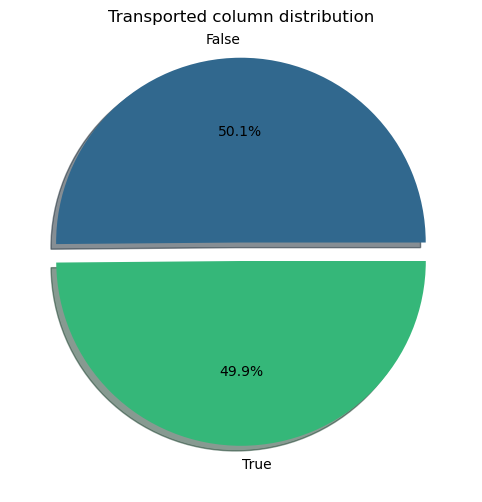

In [24]:
# How is the target variable (`Transported`) distributed?
plt.figure(figsize=(8, 6))
transported_counts = train_df['Transported'].value_counts()
explode = (0.1, 0)  # explode the first slice (False)
plt.pie(transported_counts, labels=transported_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(transported_counts)), shadow=True, explode=explode)
plt.title('Transported column distribution')
plt.show()

### 2. Categorical Features Analysis
- How does `HomePlanet` affect the target variable?
- Does `Destination` influence whether a passenger is transported?
- Is there a relationship between `Side` and Transported?
- How does `Age` affect the likelihood of being transported?

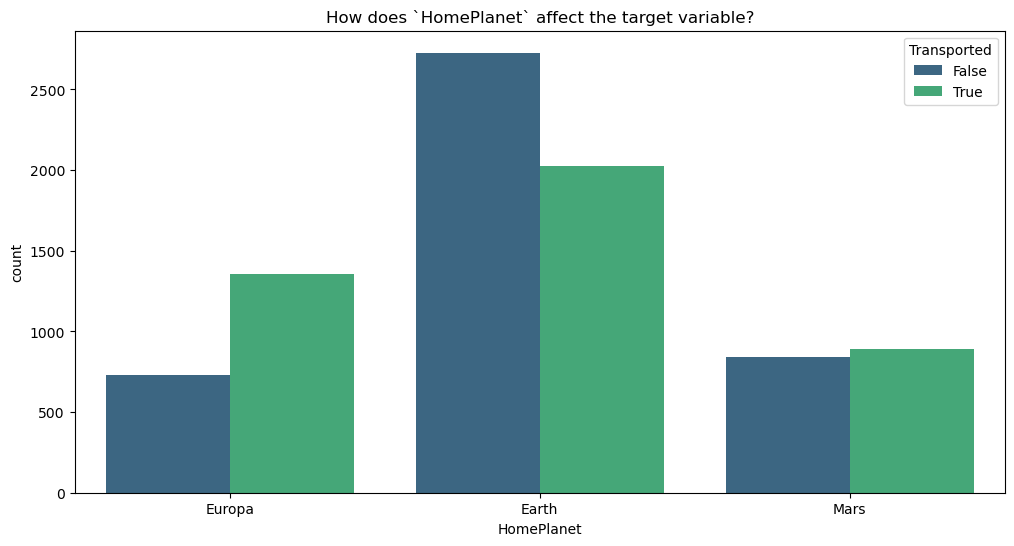

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='HomePlanet', hue='Transported', palette='viridis')
plt.title('How does `HomePlanet` affect the target variable?')
plt.show()

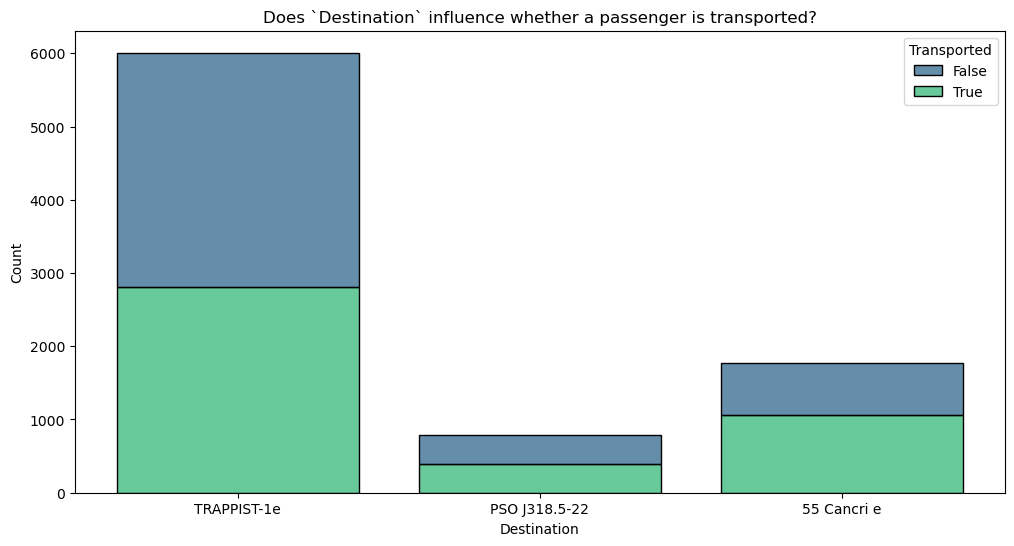

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Destination', hue='Transported', multiple='stack', palette='viridis', shrink=0.8)
plt.title('Does `Destination` influence whether a passenger is transported?')
plt.show()

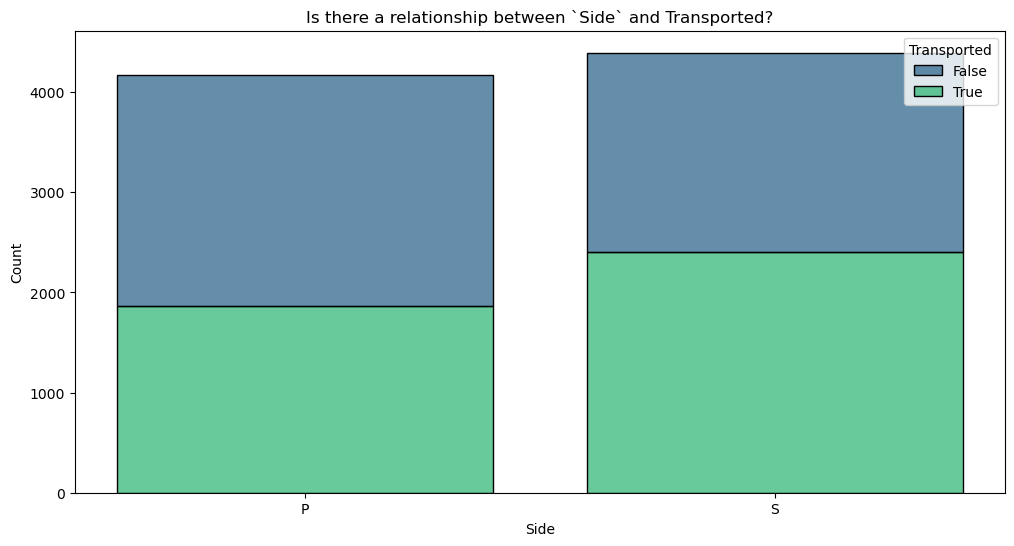

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Side', hue='Transported', multiple='stack', palette='viridis', shrink=0.8)
plt.title('Is there a relationship between `Side` and Transported?')
plt.show()

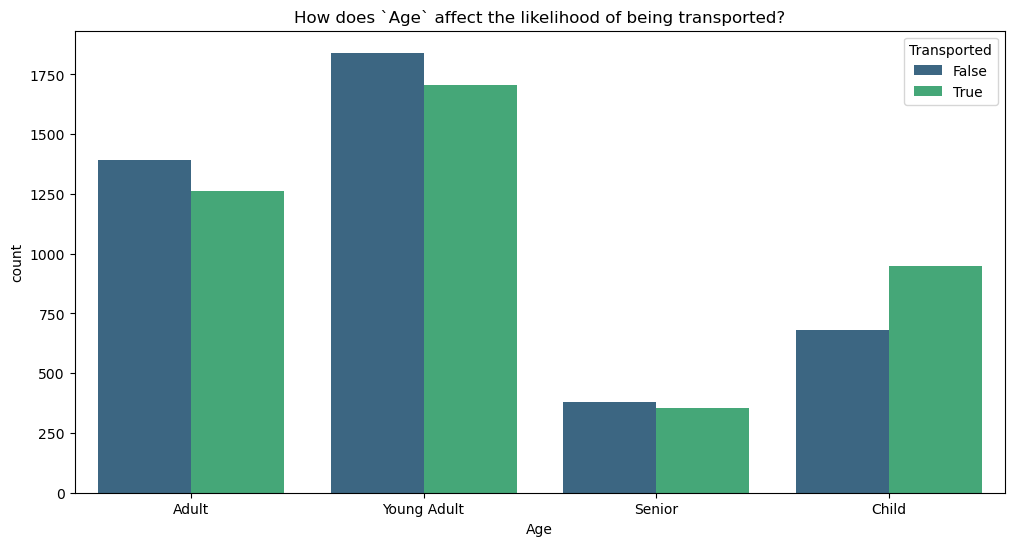

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Age', hue='Transported', palette='viridis')
plt.title('How does `Age` affect the likelihood of being transported?')
plt.show()

### 3. Numerical Features Analysis
- Are there differences in spending (`TotalBill`) between transported and non-transported passengers?

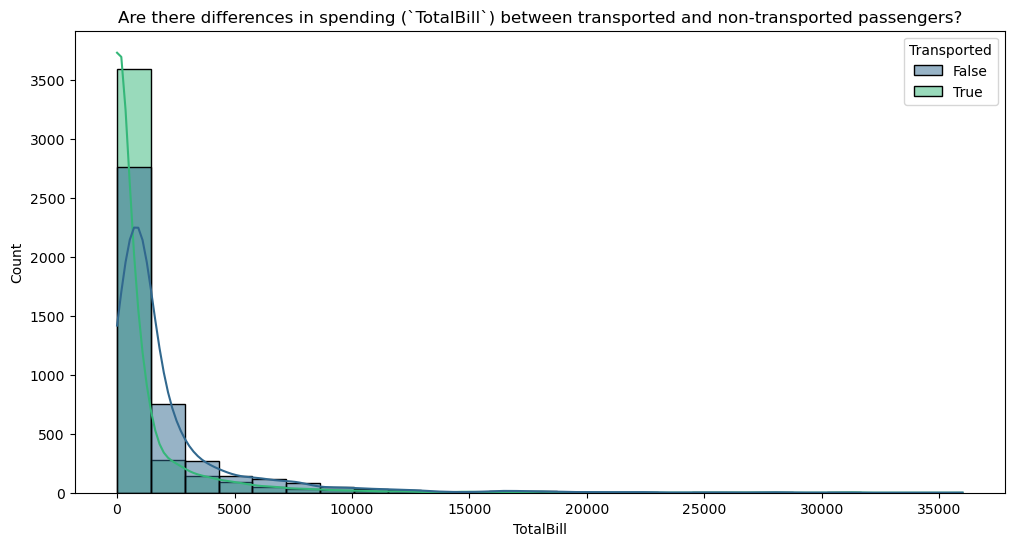

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='TotalBill', kde=True, hue='Transported', palette='viridis', bins=25)
plt.title('Are there differences in spending (`TotalBill`) between transported and non-transported passengers?')
plt.show()

### 4. Correlation Analysis
- Are there strong correlations between features and the target variable?

In [30]:
# convert categorical columns to numerical columns
train_df_ = pd.get_dummies(train_df, drop_first=True)
test_df_ = pd.get_dummies(test_df, drop_first=True)

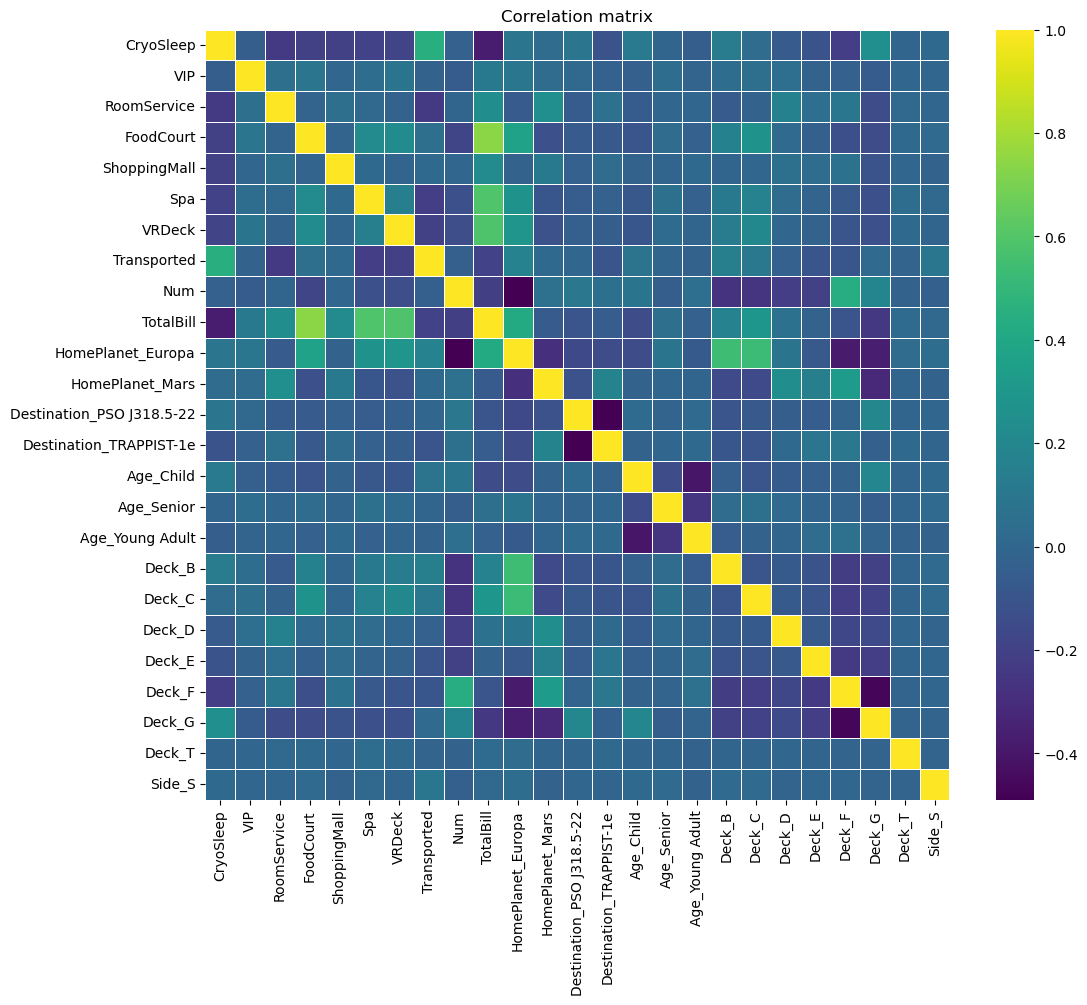

In [31]:
# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_df_.corr(), annot=False, cmap='viridis', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [32]:
# select the features that have a good correlation with the target variable
train_df_.corr()['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.448651
HomePlanet_Europa            0.172947
Deck_B                       0.144857
Deck_C                       0.107601
Side_S                       0.097828
Age_Child                    0.080418
FoodCourt                    0.049329
Deck_G                       0.021446
HomePlanet_Mars              0.016185
ShoppingMall                 0.013022
Destination_PSO J318.5-22    0.002469
Age_Senior                  -0.010023
Deck_T                      -0.014436
VIP                         -0.022589
Age_Young Adult             -0.029264
Deck_D                      -0.033528
Num                         -0.043891
Deck_F                      -0.092092
Destination_TRAPPIST-1e     -0.094876
Deck_E                      -0.096292
TotalBill                   -0.196064
VRDeck                      -0.203759
Spa                         -0.217771
RoomService                 -0.240653
Name: Transported, dtype: float64

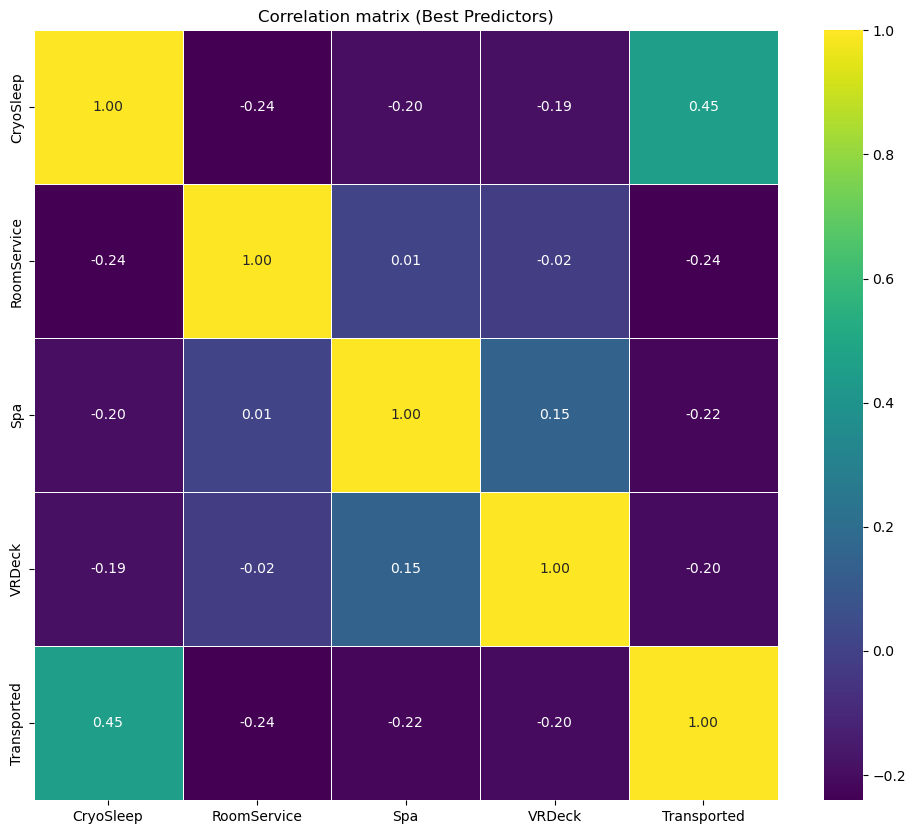

In [33]:
good_predictors = ['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'Transported']
# Display the CM for the selected features
plt.figure(figsize=(12, 10))
sns.heatmap(train_df_[good_predictors].corr(), annot=True, cmap='viridis', linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix (Best Predictors)')
plt.show()

<div class="alert alert-block alert-info""> 
    
**Exploratory Data Analysis (EDA) Recap**

1. **Target Variable Analysis**:
    - Analyzed the distribution of the target variable (`Transported`) using a pie chart.

2. **Categorical Features Analysis**:
    - Investigated how `HomePlanet` affects the target variable using a count plot.
    - Examined the influence of `Destination` on whether a passenger is transported using a histogram.
    - Explored the relationship between `Side` and `Transported` using a histogram.
    - Analyzed how `Age` affects the likelihood of being transported using a count plot.

3. **Numerical Features Analysis**:
    - Compared the spending (`TotalBill`) between transported and non-transported passengers using a histogram with KDE.

4. **Correlation Analysis**:
    - Converted categorical columns to numerical columns using one-hot encoding.
    - Displayed the correlation matrix of all features using a heatmap.
    - Identified features with strong correlations to the target variable.
    - Displayed the correlation matrix for the selected features with the best correlation to the target variable.
<div/>

<h2 align="center"> <font color='#208cb0'>Build and Train a Machine Learning Models 🚂</font></h2>

### Import Required Libraries & Select Features and Target

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Split the data into features and target variable
features = ['CryoSleep', 'RoomService', 'Spa', 'VRDeck']
target = 'Transported'

X = train_df[features]
y = train_df[target]

### Prepare the Data

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

### Define a Function for ROC Curve

In [36]:
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

### Model (1) - Logistic Regression

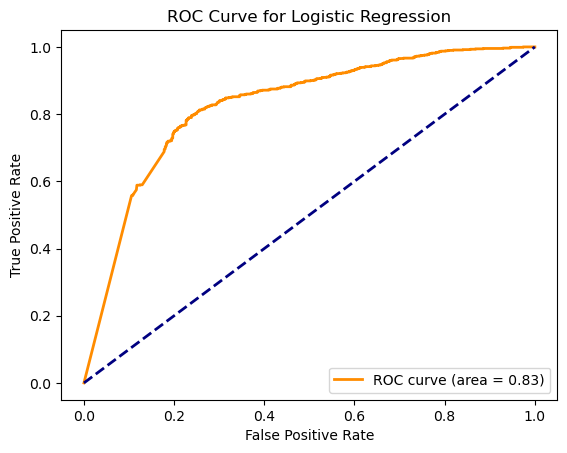

Logistic Regression Cross-Validation Accuracy: 0.7639


In [37]:
# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Perform cross-validation
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
log_reg_cv_mean = np.mean(log_reg_cv_scores)

# Train the model
log_reg.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_curve(y_test, y_pred_prob_log_reg, "Logistic Regression")

# Print cross-validation results
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv_mean:.4f}")

### Model (2) - Random Forest

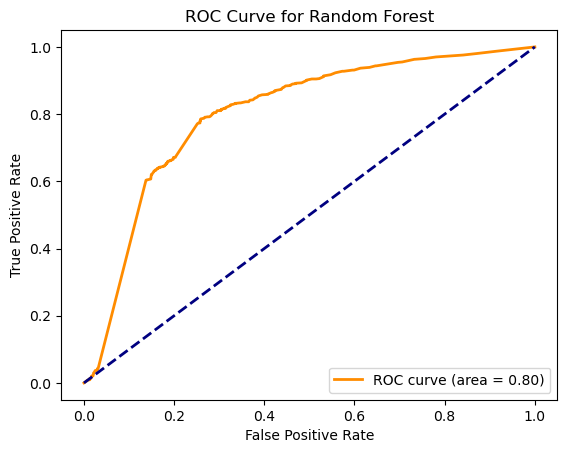

Random Forest Cross-Validation Accuracy: 0.7407


In [38]:
# Initialize the model
rf = RandomForestClassifier(random_state=29)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
rf_cv_mean = np.mean(rf_cv_scores)

# Train the model
rf.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_curve(y_test, y_pred_prob_rf, "Random Forest")

# Print cross-validation results
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_mean:.4f}")

### Model (3) - Gradient Boosting (XGBoost)

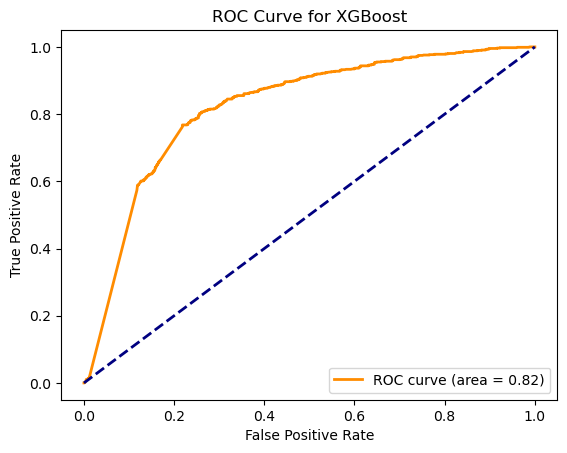

XGBoost Cross-Validation Accuracy: 0.7529


In [39]:
# Initialize the model
xgb = XGBClassifier(random_state=29)

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_mean = np.mean(xgb_cv_scores)

# Train the model
xgb.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_curve(y_test, y_pred_prob_xgb, "XGBoost")

# Print cross-validation results
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_mean:.4f}")

### Model (4) - K-Nearest Neighbors (KNN)

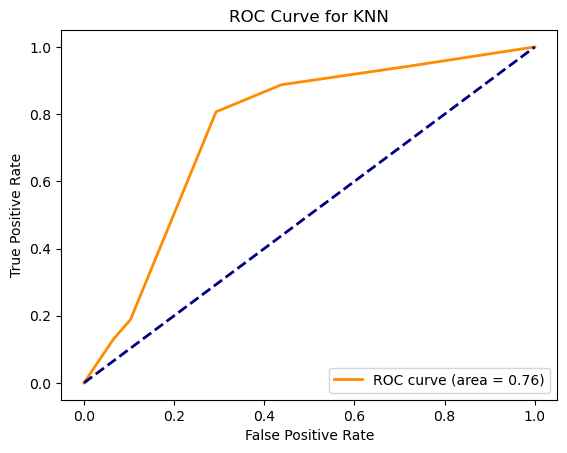

KNN Cross-Validation Accuracy: 0.7500


In [40]:
# Initialize the model
knn = KNeighborsClassifier()

# Perform cross-validation
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
knn_cv_mean = np.mean(knn_cv_scores)

# Train the model
knn.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_curve(y_test, y_pred_prob_knn, "KNN")

# Print cross-validation results
print(f"KNN Cross-Validation Accuracy: {knn_cv_mean:.4f}")

### Model (5) - Naive Bayes

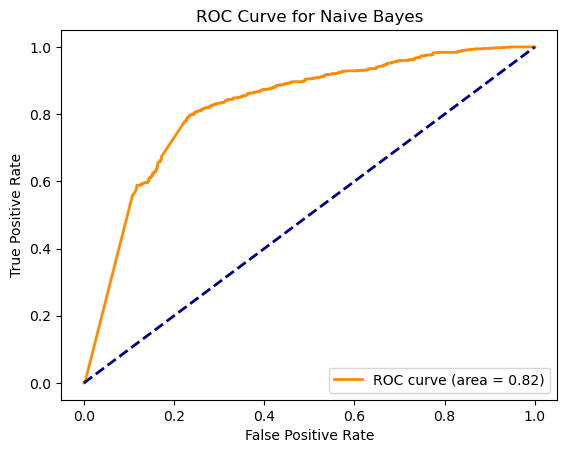

Naive Bayes Cross-Validation Accuracy: 0.6636


In [41]:
# Initialize the model
nb = GaussianNB()

# Perform cross-validation
nb_cv_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
nb_cv_mean = np.mean(nb_cv_scores)

# Train the model
nb.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_curve(y_test, y_pred_prob_nb, "Naive Bayes")

# Print cross-validation results
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_mean:.4f}")

### Results - DataFrame for Comparison

In [42]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Naive Bayes'],
    'Cross-Validation Accuracy': [log_reg_cv_mean, rf_cv_mean, xgb_cv_mean, knn_cv_mean, nb_cv_mean]
}

results_df = pd.DataFrame(results)
results_df['Cross-Validation Accuracy'] = np.round(results_df['Cross-Validation Accuracy'] * 100, 2)
results_df.sort_values(by='Cross-Validation Accuracy', ascending=False, ignore_index=True)

,Model,Cross-Validation Accuracy
0,Logistic Regression,76.39
1,XGBoost,75.29
2,KNN,75.00
3,Random Forest,74.07
4,Naive Bayes,66.36


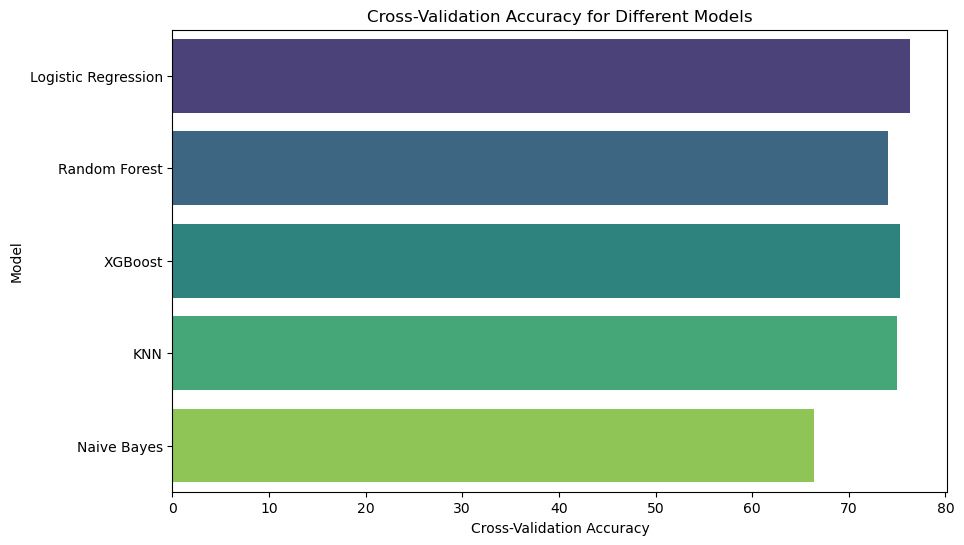

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cross-Validation Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Cross-Validation Accuracy for Different Models')
plt.xlabel('Cross-Validation Accuracy')
plt.ylabel('Model')
plt.show()

<h2 align="center"> <font color='#208cb0'>Best Fit Model ⚙️</font></h2>

### Hyperparameter Tuning for Logistic Regression

In [44]:
# Parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2
}

In [45]:
log_reg = LogisticRegression(random_state=29)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", grid_search_lr.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy for Logistic Regression: 0.76868086057915


In [46]:
# Initialize the Logistic Regression model with the best hyperparameters
best_log_reg = LogisticRegression(C=0.001, penalty='l2', solver='liblinear', random_state=42)

# Train the model on the full training dataset
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=42, solver='liblinear')

In [47]:
# Prepare testing dataset for prediction
X_testing = test_df[features]
X_testing

,CryoSleep,RoomService,Spa,VRDeck
0,True,0.0,0.0,0.0
1,False,0.0,2823.0,0.0
2,True,0.0,0.0,0.0
3,False,0.0,181.0,585.0
4,False,10.0,0.0,0.0
...,...,...,...,...
4272,True,0.0,0.0,0.0
4273,False,0.0,10.0,144.0
4274,True,0.0,0.0,0.0
4275,False,0.0,0.0,523.0


In [48]:
# Make predictions
y_testing_pred = best_log_reg.predict(X_testing)

submission_file = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': y_testing_pred  # Predicted target variable
})

# Save to a CSV file
submission_file.to_csv('submission.csv', index=False)

submission_file

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,False
